In [31]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

In [26]:
housing = fetch_openml(name="house_prices", as_frame=True).frame
X = housing.drop("SalePrice", axis=1)
y = housing["SalePrice"]

In [27]:
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

In [28]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
])

In [33]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsRegressor(n_neighbors=5)),
])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.score(X_test_scaled, y_test)

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

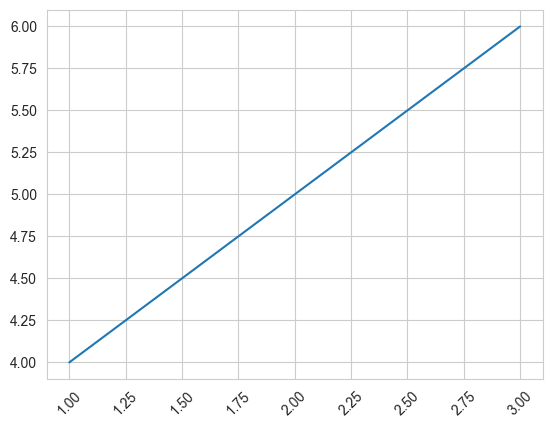

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],[4,5,6])
plt.xticks(rotation=45)
plt.show()

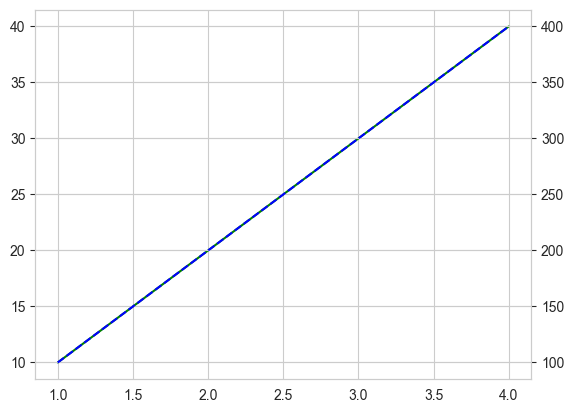

In [4]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y1 = [10, 20, 30, 40]
y2 = [100, 200, 300, 400]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b--')